In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score,r2_score
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('housing_data.csv')

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
data.shape

(506, 14)

In [6]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [10]:
data.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [12]:
data.fillna(data.mean(),inplace=True)

In [13]:
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


<ipython-input-14-ddb1e0d59d89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.MEDV)


<Axes: xlabel='MEDV', ylabel='Density'>

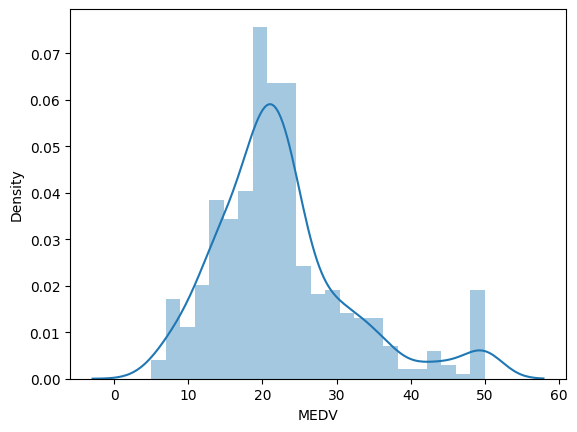

In [14]:
sns.distplot(data.MEDV)

<Axes: ylabel='MEDV'>

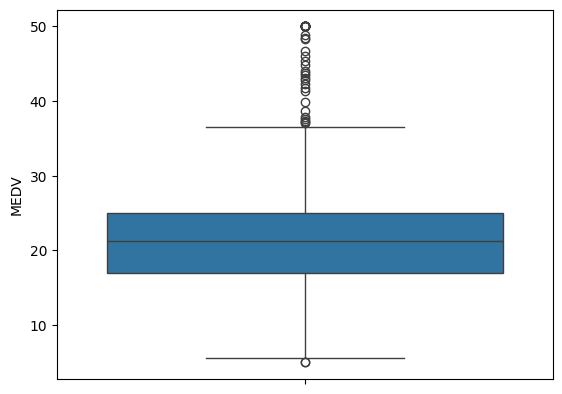

In [15]:
sns.boxplot(data.MEDV)

In [16]:
correlation=data.corr()
correlation.loc['MEDV']

,MEDV
CRIM,-0.379695
ZN,0.365943
INDUS,-0.478657
CHAS,0.179882
NOX,-0.427321
RM,0.695360
AGE,-0.380223
DIS,0.249929
RAD,-0.381626
TAX,-0.468536


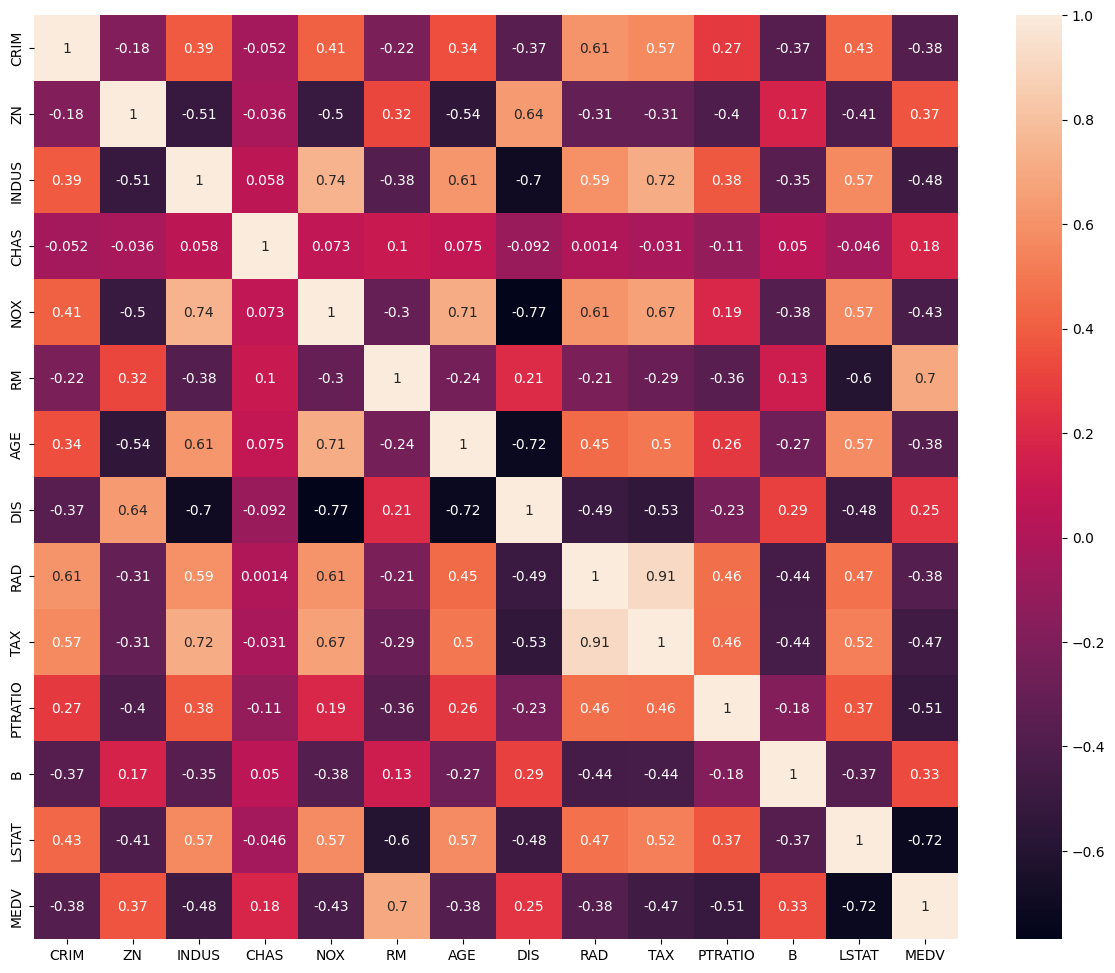

In [72]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation,square=True,annot=True)
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

In [22]:
x=data.iloc[:,:-1]
y=data.MEDV

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [42]:
mean=x_train.mean(axis=0)
std=x_train.std(axis=0)
x_train=(x_train-mean)/std
x_test=(x_test-mean)/std

In [43]:
model=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
model.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred=model.predict(x_test)

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
mse=mean_squared_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)

In [48]:
print(mse)

25.01767202384268


In [49]:
print(r2score)

0.6588520195508143


In [50]:
print(rmse)

5.0017668901941725


In [51]:

from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [53]:

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [61]:
model1=Sequential()
model1.add(Dense(128,activation='relu',input_dim=13))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(16,activation='relu'))
model1.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model1.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [65]:
history=model1.fit(x_train,y_train,epochs=100,validation_split=0.05)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 555.3037 - mae: 21.6331 - val_loss: 460.2162 - val_mae: 19.8807
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 488.9822 - mae: 19.9376 - val_loss: 329.5980 - val_mae: 16.3543
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 368.3618 - mae: 16.6139 - val_loss: 122.6595 - val_mae: 8.7699
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 142.9155 - mae: 9.3281 - val_loss: 53.4201 - val_mae: 4.8454
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 66.7825 - mae: 6.5590 - val_loss: 55.4765 - val_mae: 4.4049
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 34.7732 - mae: 4.3455 - val_loss: 56.8791 - val_mae: 4.7116
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 29.8398 - mae: 4.0501 - val_loss: 53.8986 - val_mae: 5.0016
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.9760 - mae: 3.6779 - val_loss: 53.4268 - val_mae: 4.6159
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━

In [66]:
test_mse,test_mae=model1.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.8560 - mae: 2.1861


In [67]:
test_mse

12.207098007202148

In [68]:
test_mae

2.392690896987915

In [70]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)




In [71]:
new_data = [[0.1, 10.0, 5.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 20, 300, 10]]
new_data_scaled = sc.transform(new_data)
prediction = model.predict(new_data_scaled)
print("Predicted house price:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted house price: [[10.516664]]
